In [1]:
#load libraries

library(GEOquery)
library(affy)
library(oligo)
library(stringr)
library(affxparser)
library(tcltk)
library(sva)
library(scatterplot3d)
library(limma)

Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, as.vector, cbind, colnames,
    do.call, duplicated, eval, evalq, Filter, Find, get, grep, grepl,
    intersect, is.unsorted, lapply, lengths, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unlist, unsplit

Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To c

In [2]:
#function definitions

cel_dates <- function(cel_paths) {
    #IN: vector with paths to CEL files
    #OUT: vector of CEL scan dates
    scan_dates <- c()
    for (i in seq_along(cel_paths)) {
        datheader <- readCelHeader(cel_paths[i])$datheader
        scan_date <- gsub(".*([0-9]{2}/[0-9]{2}/[0-9]{2}).*", "\\1", datheader)
        scan_dates[i] <- scan_date       
    }
    return (scan_dates)
}

In [164]:
#get raw data
gse_name <- "GSE60596"
data_dir <- paste(getwd(), "data", sep="/")
gse_dir <- paste(data_dir, gse_name, sep="/")

if (!file.exists(gse_dir)) {
    getGEOSuppFiles(gse_name, baseDir=data_dir)    
}

In [165]:
#untar
tar_name <- list.files(gse_dir, pattern="tar")
untar(paste(gse_dir, tar_name, sep="/"), exdir=gse_dir)

#unzip
cel_paths <- list.files(gse_dir, pattern=".CEL.gz", full.names=T)
sapply(cel_paths, gunzip, overwrite=T)

#get GSEMatrix (for pheno data)
eset <- getGEO(gse_name, destdir=gse_dir, GSEMatrix=T)[[1]]

#load celfiles and normalize
cel_paths <- list.files(gse_dir, pattern=".CEL", full.names=T)
data <- tryCatch (
    {
        raw_data <- ReadAffy (celfile.path=gse_dir)
        affy::rma(raw_data)
    },
    warning = function(cond) {
        raw_data <- read.celfiles(cel_paths)
        return (oligo::rma(raw_data))  
    } 
)

/home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483027_Mouse_EF_CD-1.CEL.gz 
                                                                                            11118245 
  /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483028_Mouse_EF_CD-2.CEL.gz 
                                                                                            11124001 
  /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483029_Mouse_EF_CD-3.CEL.gz 
                                                                                            11128249 
/home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483030_Mouse_EF_CR55-1.CEL.gz 
                                                                                            11119305 
/home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483031_Mouse_EF_CR55-2.CEL.gz 
                                                                                            11117817 
/home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483032_Mouse_EF_CR55-3.CEL.gz 
                                                                                            11134701 
/home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483033_Mouse_EF_CR70-1.CEL.gz 
                                                                                            11123421 
/home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483034_Mouse_EF_CR70-2.CEL.gz 
                                                                                            11129797 
/home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483035_Mouse_EF_CR70-3.CEL.gz 
                                                                                            11120861 
/home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483036_Mouse_EF_CR85-1.CEL.gz 
                                                                                            11121325 
/home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483037_Mouse_EF_CR85-2.CEL.gz 
                                                                                            11124189 
/home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483038_Mouse_EF_CR85-3.CEL.gz 
                                                                                            11133609

ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE60nnn/GSE60596/matrix/
Found 1 file(s)
GSE60596_series_matrix.txt.gz
Using locally cached version: /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSE60596_series_matrix.txt.gz
Using locally cached version of GPL6246 found here:
/home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GPL6246.soft 
Platform design info loaded.


Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483027_Mouse_EF_CD-1.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483028_Mouse_EF_CD-2.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483029_Mouse_EF_CD-3.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483030_Mouse_EF_CR55-1.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483031_Mouse_EF_CR55-2.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483032_Mouse_EF_CR55-3.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483033_Mouse_EF_CR70-1.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483034_Mouse_EF_CR70-2.CEL
Reading in : /home/alex/Documents/Batcave/GEO/caloric-restriction/data/GSE60596/GSM1483035_Mouse_EF_CR70-3.CEL
Reading

In [166]:
#rename samples in data
sampleNames(data) <- str_extract(sampleNames(data), "GSM[0-9]+")

#transfer exprs from data to eset (maintaining eset sample/feature order)
sample_order <- sampleNames(eset)
feature_order <- featureNames(eset)
exprs(eset) <- exprs(data)[feature_order, sample_order]

#add scan dates to pheno data (maintaining eset sample order)
scan_dates <- cel_dates (cel_paths)
names(scan_dates) <- sampleNames(data)
pData(eset)$scan_date <- scan_dates[sample_order]

In [167]:
#TODO: allow different contrasts (e.g. seperate AL and CR groups for multiple tissues)

#select AL samples
choices <- paste(sampleNames(eset), pData(eset)$title)
AL <- tk_select.list(choices, multiple=T, title="select AL samples")
AL <- str_extract(AL, "GSM[0-9]+")
#select CR samples
CR <- tk_select.list(choices, multiple=T, title="select CR samples")
CR <- str_extract(CR, "GSM[0-9]+")

#retain selected groups only
eset <- eset[,c(AL, CR)]

#add diet to pheno group
pData(eset)[AL, "diet"] <- "AL"
pData(eset)[CR, "diet"] <- "CR"

In [168]:
#correct for scan date effects (ComBat)
batch <- pData(eset)$scan_date
exprs <- exprs(eset)
diet <- factor(pData(eset)$diet, levels=c("AL", "CR"))
model <- model.matrix(~diet)

combat_exprs <- ComBat(exprs, batch, model)
exprs(eset) <- combat_exprs

Found 3 batches
Adjusting for 1 covariate(s) or covariate level(s)
Standardizing Data across genes
Fitting L/S model and finding priors
Finding parametric adjustments
Adjusting the Data


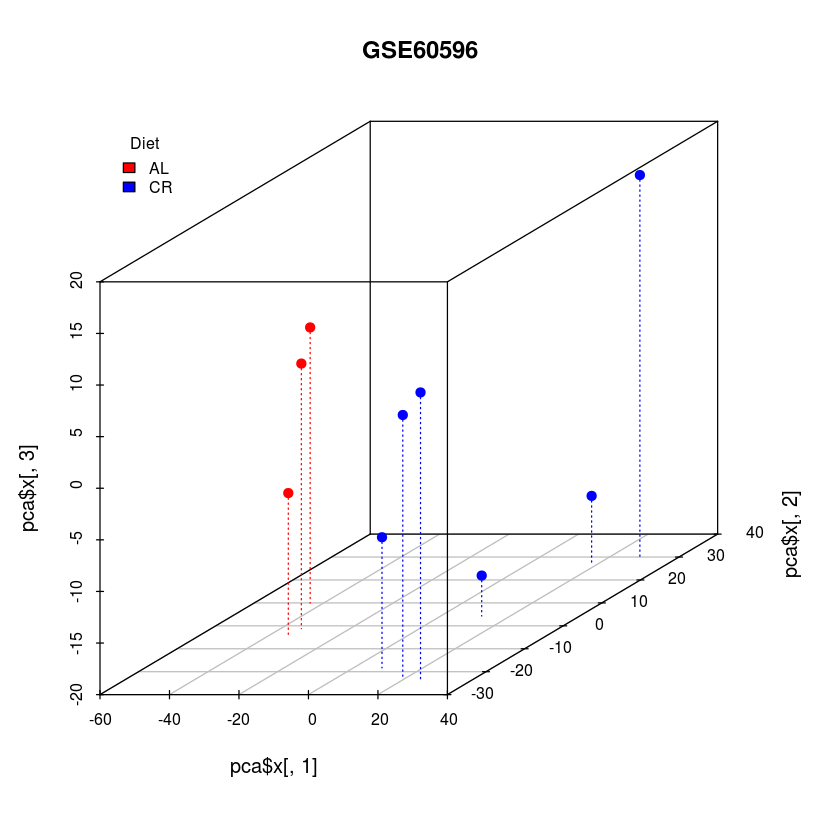

In [169]:
#PCA for CR/AL

colors <- ifelse(diet == "AL", "red", "blue")
pca <- prcomp(t(exprs(eset)))

s3d <- scatterplot3d(pca$x[,1], pca$x[,2], pca$x[,3], 
                     main = gse_name, 
                     color = colors,
                     pch=19, type="h", lty.hplot=3)

s3d.coords <- s3d$xyz.convert(pca$x[,1], pca$x[,2], pca$x[,3])

legend("topleft", inset=.05, 
       bty="n", cex=.8,
       title="Diet",
       c("AL", "CR"), fill=c("red", "blue"))

In [180]:
#differential expression (limma)
fit <- lmFit(exprs(eset), model)
ebayes <- eBayes(fit)
top_genes <- topTable(ebayes, coef=2, n=Inf, resort.by="logFC", p.value=0.05)
